In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [29]:
file_path=r"C:\Users\sooraj\Downloads\nation.csv\nation.csv"
df=pd.read_csv(file_path)
df.head()

,area_type,area_name,area_code,date,new_cases_by_publish_date,cum_cases_by_publish_date,cum_cases_by_publish_date_rate,new_cases_by_specimen_date,cum_cases_by_specimen_date,cum_cases_by_specimen_date_rate,...,cum_deaths_28_days_by_publish_date_rate,new_deaths_28_days_by_death_date,cum_deaths_28_days_by_death_date,cum_deaths_28_days_by_death_date_rate,new_people_vaccinated_first_dose_by_publish_date,new_people_vaccinated_second_dose_by_publish_date,cum_people_vaccinated_first_dose_by_publish_date,cum_people_vaccinated_second_dose_by_publish_date,new_people_vaccinated_third_injection_by_publish_date,cum_people_vaccinated_third_injection_by_publish_date
0,nation,England,E92000001,25-02-2022,23526.0,15998983.0,28291.7,NaN,NaN,NaN,...,248.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nation,England,E92000001,24-02-2022,28193.0,15975718.0,28250.5,11855.0,15998983.0,28291.7,...,248.1,14.0,140392.0,248.3,7066.0,14301.0,44233366.0,41092655.0,19624.0,31783653.0
2,nation,England,E92000001,23-02-2022,29703.0,15947871.0,28201.3,24560.0,15987128.0,28270.7,...,247.9,35.0,140378.0,248.2,8063.0,16271.0,44226300.0,41078354.0,21184.0,31764029.0
3,nation,England,E92000001,22-02-2022,30080.0,15918472.0,28149.3,27505.0,15962568.0,28227.3,...,247.7,65.0,140343.0,248.2,7503.0,16106.0,44218237.0,41062083.0,21337.0,31742845.0
4,nation,England,E92000001,21-02-2022,29753.0,15888557.0,28096.4,32843.0,15935063.0,28178.6,...,247.4,68.0,140278.0,248.1,6376.0,14421.0,44210734.0,41045977.0,19416.0,31721508.0


In [30]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 37 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   area_type                                              2948 non-null   object 
 1   area_name                                              2948 non-null   object 
 2   area_code                                              2948 non-null   object 
 3   date                                                   2948 non-null   object 
 4   new_cases_by_publish_date                              2934 non-null   float64
 5   cum_cases_by_publish_date                              2934 non-null   float64
 6   cum_cases_by_publish_date_rate                         2896 non-null   float64
 7   new_cases_by_specimen_date                             2944 non-null   float64
 8   cum_cases_by_specimen_date                      

area_type                                                   0
area_name                                                   0
area_code                                                   0
date                                                        0
new_cases_by_publish_date                                  14
cum_cases_by_publish_date                                  14
cum_cases_by_publish_date_rate                             52
new_cases_by_specimen_date                                  4
cum_cases_by_specimen_date                                  4
cum_cases_by_specimen_date_rate                            40
male_cases                                                 12
female_cases                                               12
new_pillar_one_tests_by_publish_date                      203
cum_pillar_one_tests_by_publish_date                      184
new_pillar_two_tests_by_publish_date                      489
cum_pillar_two_tests_by_publish_date                      470
new_pill

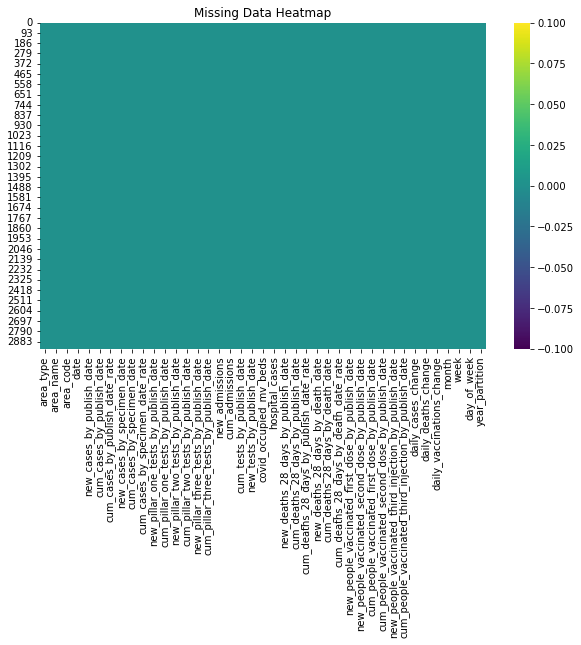

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\sooraj\Downloads\nation.csv\nation.csv"
df = pd.read_csv(file_path)

# Fill missing values with 0
df.fillna(0, inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Convert the date column to datetime format with explicit format
df['date'] = pd.to_datetime(df['date'], dayfirst=True, infer_datetime_format=True)

# Reverse the DataFrame and reset the index
df_reversed = df.iloc[::-1].reset_index(drop=True)

# Calculate daily changes
df_reversed['daily_cases_change'] = df_reversed['cum_cases_by_publish_date'].diff().fillna(0)
df_reversed['daily_deaths_change'] = df_reversed['cum_deaths_28_days_by_publish_date'].diff().fillna(0)
df_reversed['daily_vaccinations_change'] = df_reversed['cum_people_vaccinated_first_dose_by_publish_date'].diff().fillna(0)

# Extract month, week, and day of week
df_reversed['month'] = df_reversed['date'].dt.month
df_reversed['week'] = df_reversed['date'].dt.isocalendar().week
df_reversed['day_of_week'] = df_reversed['date'].dt.dayofweek

# Define custom function to partition years and apply it
def get_year_partition(row):
    year = row.year
    month = row.month
    
    if year == 2020:
        if 2 <= month <= 4:
            return 0
        elif 5 <= month <= 7:
            return 1
        elif 8 <= month <= 10:
            return 2
        elif 11 <= month <= 12:
            return 3
    elif year == 2021:
        if month == 1:
            return 3
        elif 2 <= month <= 4:
            return 4
        elif 5 <= month <= 7:
            return 5
        elif 8 <= month <= 10:
            return 6
        elif 11 <= month <= 12:
            return 7
    elif year == 2022:
        if 1 <= month <= 2:
            return 7
    return 0  # Ensure default value is 0 for missing or out-of-range dates

df_reversed['year_partition'] = df_reversed['date'].apply(get_year_partition).astype('Int64').fillna(0)

# Drop non-relevant or redundant columns
df_reversed = df_reversed.drop(['male_cases', 'female_cases', 'cum_admissions_by_age'], axis=1)

# Ensure all columns are numerical
df_reversed = df_reversed.apply(pd.to_numeric, errors='coerce')

# Fill missing values with 0
df_cleaned = df_reversed.fillna(0)

# Plot the heatmap of missing values
plt.figure(figsize=(10, 6))
plt.title('Missing Data Heatmap')
sns.heatmap(df_cleaned.isnull(), cbar=True, cmap='viridis')
plt.show()


In [32]:
df.fillna(0,inplace=True)

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df['date'] = pd.to_datetime(df['date'])

In [35]:
df.dropna(inplace=True)

In [36]:
df_reversed = df.iloc[::-1].reset_index(drop=True)
df_reversed

,area_type,area_name,area_code,date,new_cases_by_publish_date,cum_cases_by_publish_date,cum_cases_by_publish_date_rate,new_cases_by_specimen_date,cum_cases_by_specimen_date,cum_cases_by_specimen_date_rate,...,cum_deaths_28_days_by_publish_date_rate,new_deaths_28_days_by_death_date,cum_deaths_28_days_by_death_date,cum_deaths_28_days_by_death_date_rate,new_people_vaccinated_first_dose_by_publish_date,new_people_vaccinated_second_dose_by_publish_date,cum_people_vaccinated_first_dose_by_publish_date,cum_people_vaccinated_second_dose_by_publish_date,new_people_vaccinated_third_injection_by_publish_date,cum_people_vaccinated_third_injection_by_publish_date
0,nation,Wales,W92000004,2020-02-27,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,nation,Wales,W92000004,2020-02-28,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nation,Wales,W92000004,2020-02-29,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,nation,Wales,W92000004,2020-03-01,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,nation,Wales,W92000004,2020-03-02,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,nation,England,E92000001,2022-02-21,29753.0,15888557.0,28096.4,32843.0,15935063.0,28178.6,...,247.4,68.0,140278.0,248.1,6376.0,14421.0,44210734.0,41045977.0,19416.0,31721508.0
2944,nation,England,E92000001,2022-02-22,30080.0,15918472.0,28149.3,27505.0,15962568.0,28227.3,...,247.7,65.0,140343.0,248.2,7503.0,16106.0,44218237.0,41062083.0,21337.0,31742845.0
2945,nation,England,E92000001,2022-02-23,29703.0,15947871.0,28201.3,24560.0,15987128.0,28270.7,...,247.9,35.0,140378.0,248.2,8063.0,16271.0,44226300.0,41078354.0,21184.0,31764029.0
2946,nation,England,E92000001,2022-02-24,28193.0,15975718.0,28250.5,11855.0,15998983.0,28291.7,...,248.1,14.0,140392.0,248.3,7066.0,14301.0,44233366.0,41092655.0,19624.0,31783653.0


In [37]:
df_reversed['daily_cases_change'] = df_reversed['cum_cases_by_publish_date'].diff().fillna(0)
df_reversed['daily_deaths_change'] = df_reversed['cum_deaths_28_days_by_publish_date'].diff().fillna(0)
df_reversed['daily_vaccinations_change'] = df_reversed['cum_people_vaccinated_first_dose_by_publish_date'].diff().fillna(0)

In [38]:
df_reversed['month'] = df_reversed['date'].dt.month
df_reversed['week'] = df_reversed['date'].dt.isocalendar().week
df_reversed['day_of_week'] = df['date'].dt.dayofweek
df_reversed['day_of_week'] = df['date'].dt.dayofweek

In [39]:
def get_year_partition(row):
    year = row.year
    month = row.month
    
    if year == 2020:
        if 2 <= month <= 4:
            return 0
        elif 5 <= month <= 7:
            return 1
        elif 8 <= month <= 10:
            return 2
        elif 11 <= month <= 12:
            return 3
    elif year == 2021:
        if month == 1:
            return 3
        elif 2 <= month <= 4:
            return 4
        elif 5 <= month <= 7:
            return 5
        elif 8 <= month <= 10:
            return 6
        elif 11 <= month <= 12:
            return 7
    elif year == 2022:
        if 1 <= month <= 2:
            return 7
    return 0  # Ensure default value is 0 for missing or out-of-range dates
# Apply the custom function to the DataFrame
df_reversed['year_partition'] = df_reversed['date'].apply(get_year_partition)

# Convert the year_partition column to integer type
df_reversed['year_partition'] = df_reversed['year_partition'].astype('Int64')

# Replace any remaining NaN values with 0 (though ideally, there shouldn't be any NaNs)
df_reversed['year_partition'].fillna(0, inplace=True)

# Display the DataFrame with the new column
print(df_reversed.head(20))  # Print first 20 rows for demonstration


   area_type area_name  area_code       date  new_cases_by_publish_date  \
0     nation     Wales  W92000004 2020-02-27                        0.0   
1     nation     Wales  W92000004 2020-02-28                        1.0   
2     nation     Wales  W92000004 2020-02-29                        0.0   
3     nation     Wales  W92000004 2020-03-01                        0.0   
4     nation     Wales  W92000004 2020-03-02                        0.0   
5     nation     Wales  W92000004 2020-03-03                        0.0   
6     nation     Wales  W92000004 2020-03-04                        0.0   
7     nation     Wales  W92000004 2020-03-05                        1.0   
8     nation     Wales  W92000004 2020-03-06                        0.0   
9     nation     Wales  W92000004 2020-03-07                        0.0   
10    nation     Wales  W92000004 2020-03-08                        0.0   
11    nation     Wales  W92000004 2020-03-09                        2.0   
12    nation     Wales  W

In [40]:
df_reversed['day_of_week'] = df_reversed['date'].dt.dayofweek
df_reversed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   area_type                                              2948 non-null   object        
 1   area_name                                              2948 non-null   object        
 2   area_code                                              2948 non-null   object        
 3   date                                                   2948 non-null   datetime64[ns]
 4   new_cases_by_publish_date                              2948 non-null   float64       
 5   cum_cases_by_publish_date                              2948 non-null   float64       
 6   cum_cases_by_publish_date_rate                         2948 non-null   float64       
 7   new_cases_by_specimen_date                             2948 non-null 

In [41]:
def parse_male_female_cases(cell):
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        return []

In [42]:
df_reversed['male_cases_parsed'] = df_reversed['male_cases'].apply(parse_male_female_cases)
df_reversed['female_cases_parsed'] = df_reversed['female_cases'].apply(parse_male_female_cases)

In [43]:
def extract_age_group_values(parsed_list, age_group):
    for item in parsed_list:
        if item['age'] == age_group:
            return item['value']
    return None

# Define the age groups
age_groups = ['0_to_4', '5_to_9', '10_to_14', '15_to_19', '20_to_24', '25_to_29', '30_to_34', 
              '35_to_39', '40_to_44', '45_to_49', '50_to_54', '55_to_59', '60_to_64', 
              '65_to_69', '70_to_74', '75_to_79', '80_to_84', '85_to_89', '90+']

# Create new columns for each age group
for age_group in age_groups:
    df_reversed[f'male_cases_{age_group}'] = df_reversed['male_cases_parsed'].apply(lambda x: extract_age_group_values(x, age_group))
    df_reversed[f'female_cases_{age_group}'] = df_reversed['female_cases_parsed'].apply(lambda x: extract_age_group_values(x, age_group))

# Drop the parsed column as it's no longer needed
df_reversed.drop(columns=['male_cases_parsed'], inplace=True)
df_reversed.drop(columns=['female_cases_parsed'], inplace=True)

# Display the first few rows to verify the new columns
df_reversed.head()

,area_type,area_name,area_code,date,new_cases_by_publish_date,cum_cases_by_publish_date,cum_cases_by_publish_date_rate,new_cases_by_specimen_date,cum_cases_by_specimen_date,cum_cases_by_specimen_date_rate,...,male_cases_70_to_74,female_cases_70_to_74,male_cases_75_to_79,female_cases_75_to_79,male_cases_80_to_84,female_cases_80_to_84,male_cases_85_to_89,female_cases_85_to_89,male_cases_90+,female_cases_90+
0,nation,Wales,W92000004,2020-02-27,0.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nation,Wales,W92000004,2020-02-28,1.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nation,Wales,W92000004,2020-02-29,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nation,Wales,W92000004,2020-03-01,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nation,Wales,W92000004,2020-03-02,0.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_reversed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 82 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   area_type                                              2948 non-null   object        
 1   area_name                                              2948 non-null   object        
 2   area_code                                              2948 non-null   object        
 3   date                                                   2948 non-null   datetime64[ns]
 4   new_cases_by_publish_date                              2948 non-null   float64       
 5   cum_cases_by_publish_date                              2948 non-null   float64       
 6   cum_cases_by_publish_date_rate                         2948 non-null   float64       
 7   new_cases_by_specimen_date                             2948 non-null 

In [45]:
import pandas as pd

def detect_outliers_iqr(df, features):
    outliers = pd.DataFrame()
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_feature = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outliers = pd.concat([outliers, outliers_feature])
    
    return outliers.drop_duplicates()

# Identify numerical columns
numerical_columns = df_reversed.select_dtypes(include=['float64']).columns.tolist()

# Detect outliers
outliers_iqr = detect_outliers_iqr(df_reversed, numerical_columns)
print(f'Number of outliers detected (IQR method): {len(outliers_iqr)}')

# Remove outliers based on IQR
df_cleaned_iqr = df_reversed[~df_reversed.index.isin(outliers_iqr.index)]
print(f'Number of rows after removing outliers (IQR method): {len(df_cleaned_iqr)}')


Number of outliers detected (IQR method): 1353
Number of rows after removing outliers (IQR method): 1595


In [46]:
cleaned_file_path = r'C:\Users\sooraj\Downloads\nation.csv\cleaned_nation_datafinal.csv'
df_reversed.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'C:\\Users\\sooraj\\Downloads\\nation.csv\\cleaned_nation_datafinal.csv'

In [47]:
df_reversed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 82 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   area_type                                              2948 non-null   object        
 1   area_name                                              2948 non-null   object        
 2   area_code                                              2948 non-null   object        
 3   date                                                   2948 non-null   datetime64[ns]
 4   new_cases_by_publish_date                              2948 non-null   float64       
 5   cum_cases_by_publish_date                              2948 non-null   float64       
 6   cum_cases_by_publish_date_rate                         2948 non-null   float64       
 7   new_cases_by_specimen_date                             2948 non-null 

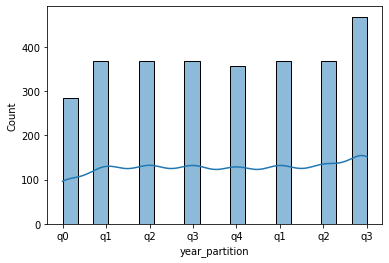

In [48]:
sns.histplot(df_reversed["year_partition"], bins=20, kde=True)

labels = ['q0', 'q1', 'q2', 'q3', 'q4', 'q1', 'q2', 'q3']

plt.xticks(ticks=range(len(labels)), labels=labels)

plt.show()

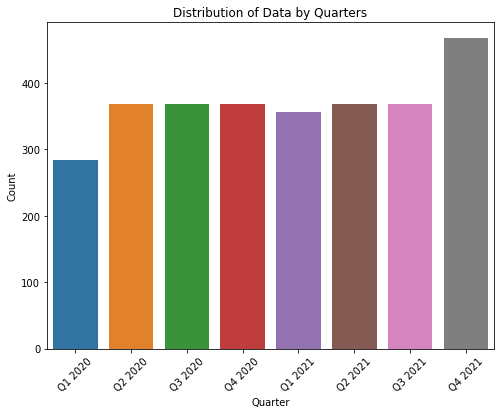

In [49]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='year_partition', data=df_reversed)
plt.title('Distribution of Data by Quarters')
plt.xlabel('Quarter')
plt.ylabel('Count')

# Define custom labels for quarters
quarter_labels = ['Q1 2020', 'Q2 2020', 'Q3 2020', 'Q4 2020', 'Q1 2021', 
                  'Q2 2021', 'Q3 2021', 'Q4 2021']

# Apply custom labels to the x-axis
plt.xticks(ticks=range(len(quarter_labels)), labels=quarter_labels, rotation=45)

# Show the plot
plt.show()

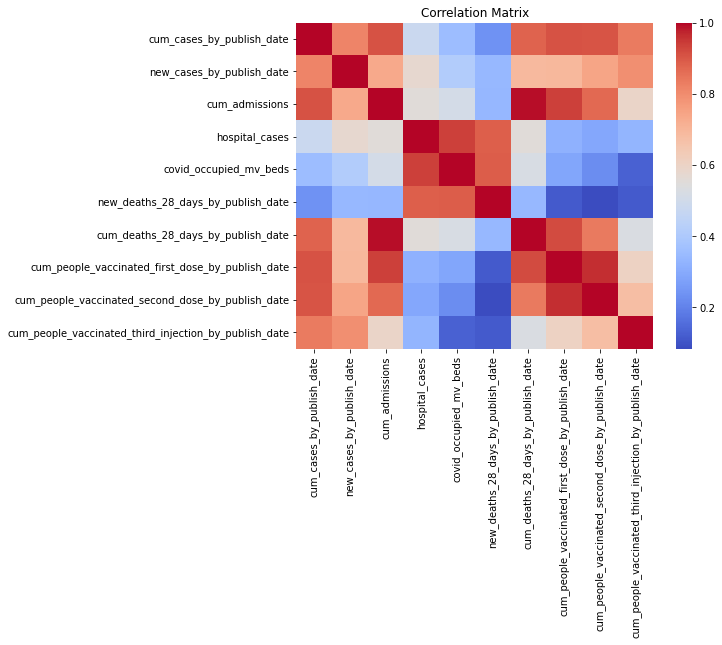

In [60]:
column_list = [ "cum_cases_by_publish_date", "new_cases_by_publish_date", "cum_admissions",
    "hospital_cases", "covid_occupied_mv_beds", "new_deaths_28_days_by_publish_date",
    "cum_deaths_28_days_by_publish_date", "cum_people_vaccinated_first_dose_by_publish_date",
    "cum_people_vaccinated_second_dose_by_publish_date", "cum_people_vaccinated_third_injection_by_publish_date"]
# Ensure the columns exist in the DataFrame
missing_columns = [col for col in column_list if col not in df_reversed.columns]
if missing_columns:
    print(f"The following columns are missing from the DataFrame: {missing_columns}")
else:
    # Convert columns to numeric, coerce errors
    df_reversed[column_list] = df_reversed[column_list].apply(pd.to_numeric, errors='coerce')
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_reversed[column_list].corr(), annot=False, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

In [51]:
# Convert categorical variables to dummy variables if necessary (e.g., 'area_type', 'area_name', 'area_code')
categorical_columns = ['area_type', 'area_name', 'area_code']

In [31]:
# Use one-hot encoding to convert categorical columns
df_reversed = pd.get_dummies(df_reversed, columns=categorical_columns, drop_first=True)

In [32]:
# Drop any non-relevant or redundant columns
df_reversed = df_reversed.drop(['male_cases', 'female_cases', 'cum_admissions_by_age'], axis=1)

In [33]:
# Ensure all columns are numerical
df_reversed = df_reversed.apply(pd.to_numeric, errors='coerce')

In [34]:
#Fill missing values with 0
df_cleaned = df_reversed.fillna(0)

In [35]:
# Define features and target variable
X = df_cleaned.drop(['cum_cases_by_publish_date'], axis=1)
y = df_cleaned['cum_cases_by_publish_date']



In [36]:
#spllitting
X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=0.2,random_state=42)

In [37]:
#Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict on the test set
y_pred_lr = model.predict(X_test)

In [39]:
# validation using evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 32038.560034387338
Mean Squared Error (MSE): 246392918627.43707
Root Mean Squared Error (RMSE): 496379.8128725997
R-squared (R2): 0.9549214208532003


In [40]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Print evaluation results
print("Linear Regression:")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  R^2 Score: {r2_lr:.4f}")
print()

Linear Regression:
  RMSE: 496379.81
  R^2 Score: 0.9549



In [41]:
residuals_lr = y_test - y_pred_lr

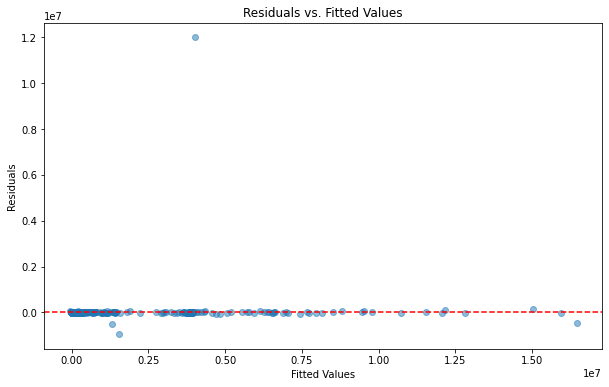

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


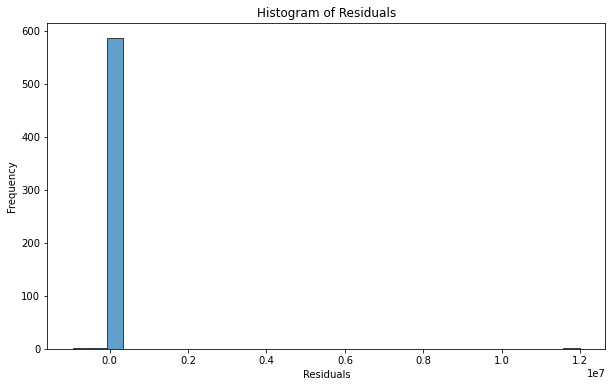

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(residuals_lr, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


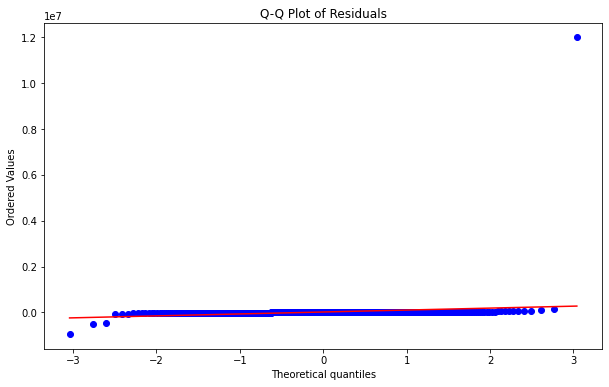

In [44]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals_lr, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [45]:
# Initialize the model
model_lasso = Lasso()

In [46]:
# Train the model
model_lasso.fit(X_train, y_train)

Lasso()

In [47]:
# Evaluate the model
y_pred_lasso = model_lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print evaluation results
print("Lasso Regression:")
print(f"  RMSE: {rmse_lasso:.2f}")
print(f"  R^2 Score: {r2_lasso:.4f}")
print()

Lasso Regression:
  RMSE: 909954.47
  R^2 Score: 0.8485



In [48]:
residuals_lasso = y_test - y_pred_lasso


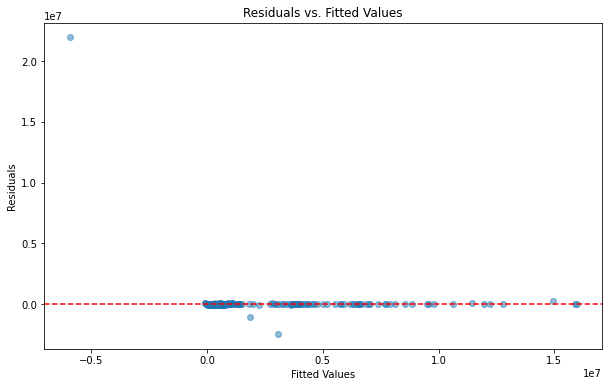

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


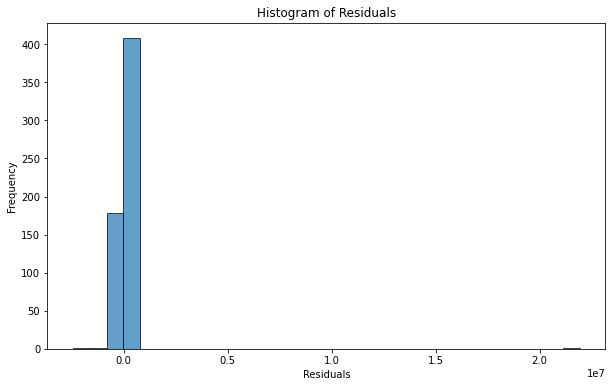

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(residuals_lasso, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


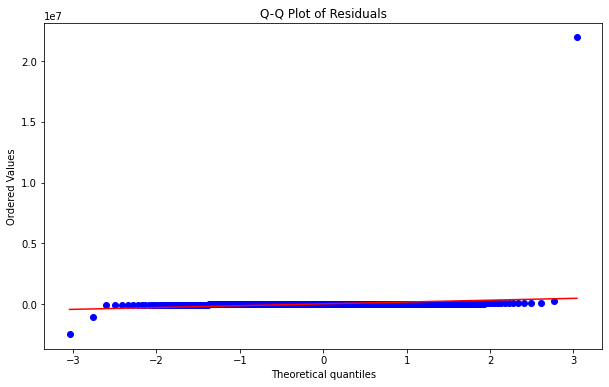

In [51]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals_lasso, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [52]:
# Initialize the model
model_dt = DecisionTreeRegressor(random_state=123)

In [53]:
# Train the model
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [54]:
# Evaluate the model
y_pred_dt = model_dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Print evaluation results
print("Decision Tree Regression:")
print(f"  RMSE: {rmse_dt:.2f}")
print(f"  R^2 Score: {r2_dt:.4f}")
print()

Decision Tree Regression:
  RMSE: 603793.60
  R^2 Score: 0.9333



In [55]:
residuals_dt = y_test - y_pred_dt


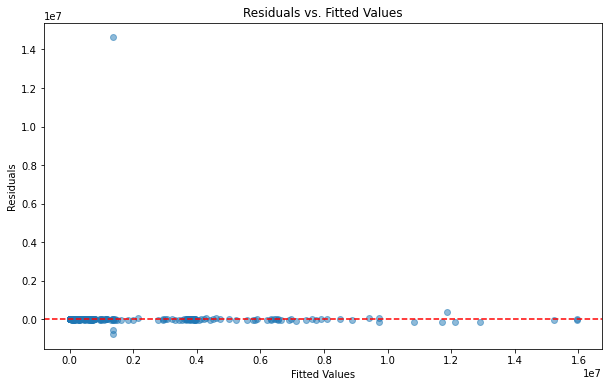

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_dt, residuals_dt, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


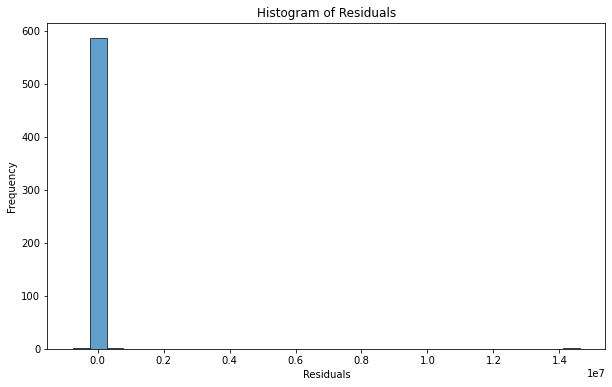

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(residuals_dt, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

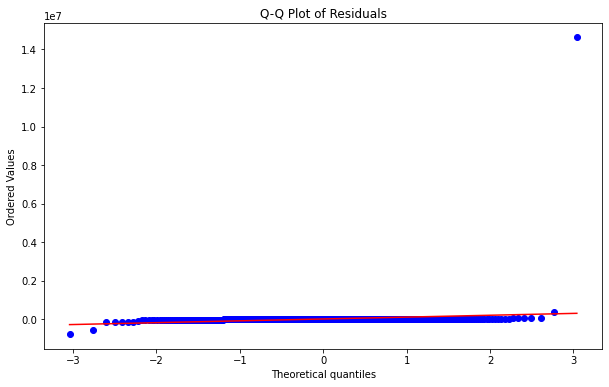

In [58]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals_dt, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [59]:
# Initialize the model
model_rf = RandomForestRegressor(random_state=123)

In [60]:
# Train the model
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [61]:
# Evaluate the model
y_pred_rf = model_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation results
print("Random Forest Regression:")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R^2 Score: {r2_rf:.4f}")
print()

Random Forest Regression:
  RMSE: 613397.42
  R^2 Score: 0.9312



In [62]:
residuals_rf = y_test - y_pred_rf


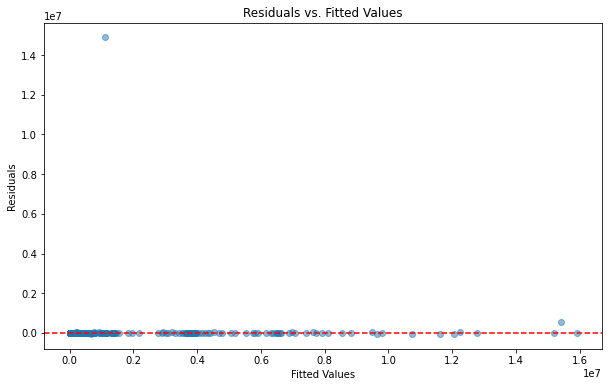

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


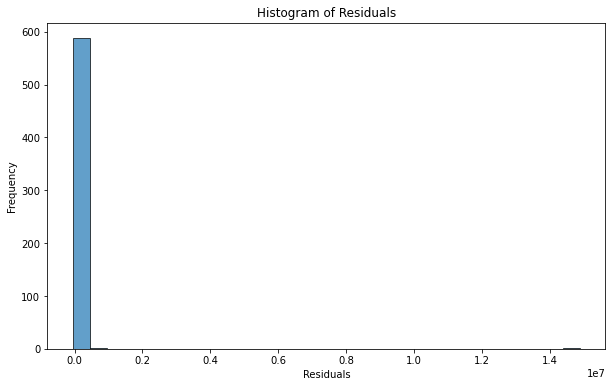

In [64]:
plt.figure(figsize=(10, 6))
plt.hist(residuals_rf, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


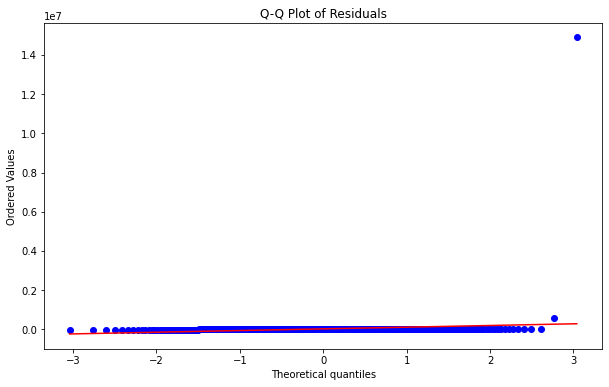

In [65]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals_rf, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [66]:
# Initialize the model
model_gb = GradientBoostingRegressor(random_state=123)

In [67]:
# Train the model
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [68]:
# Evaluate the model
y_pred_gb = model_gb.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation results
print("Gradient Boosting Regression:")
print(f"  RMSE: {rmse_gb:.2f}")
print(f"  R^2 Score: {r2_gb:.4f}")
print()

Gradient Boosting Regression:
  RMSE: 586638.89
  R^2 Score: 0.9370



In [69]:
residuals_gb = y_test - y_pred_gb


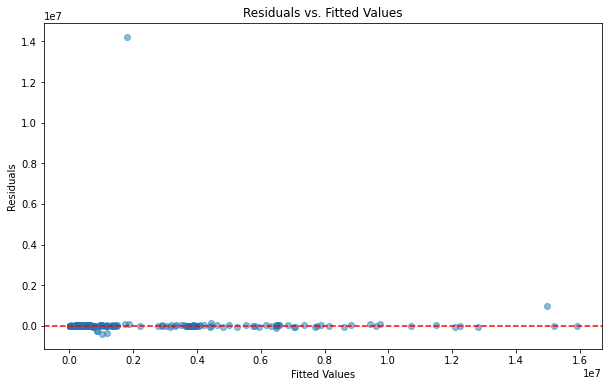

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb, residuals_gb, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

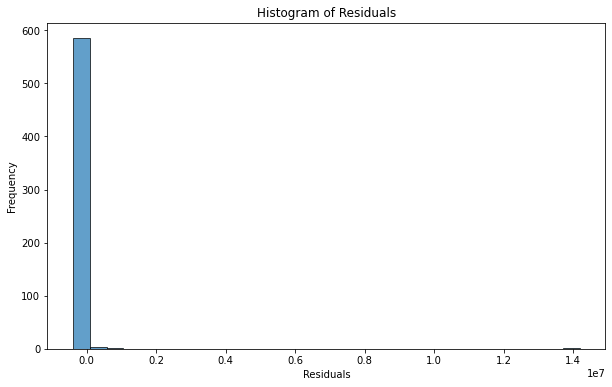

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(residuals_gb, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

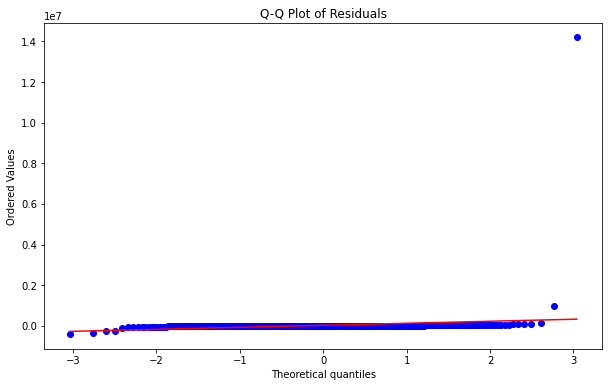

In [72]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals_gb, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [73]:
# Create a DataFrame to compare results
models_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_lr, rmse_lasso, rmse_dt, rmse_rf, rmse_gb],
    'R^2 Score': [r2_lr, r2_lasso, r2_dt, r2_rf, r2_gb]
})

# Print results in a readable format
print("Comparison of Regression Models:")
print(models_results)


Comparison of Regression Models:
               Model           RMSE  R^2 Score
0  Linear Regression  496379.812873   0.954921
1   Lasso Regression  909954.466244   0.848511
2      Decision Tree  603793.599688   0.933301
3      Random Forest  613397.424818   0.931162
4  Gradient Boosting  586638.887230   0.937037


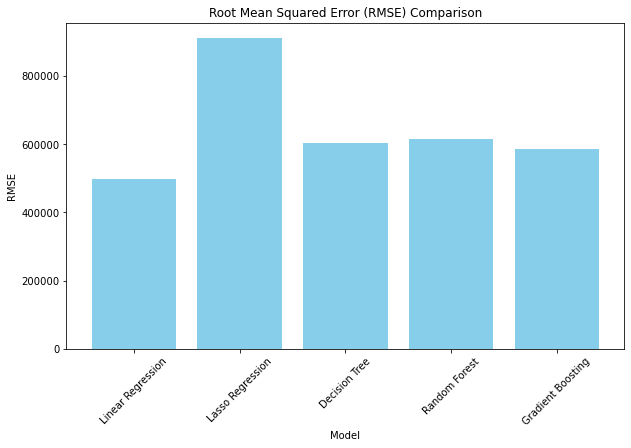

In [74]:
# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.bar(models_results['Model'], models_results['RMSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xticks(rotation=45)
plt.show()

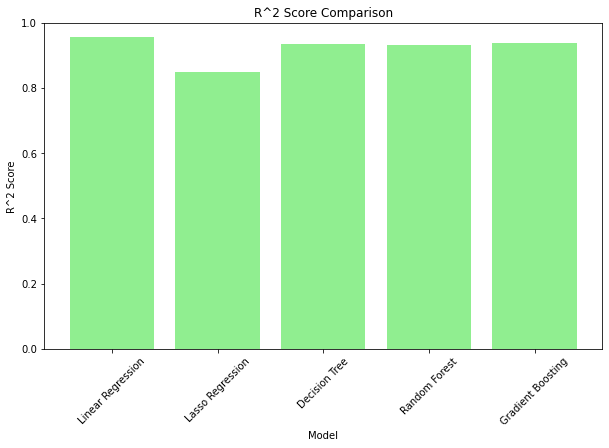

In [75]:
# Plot R^2 Score comparison
plt.figure(figsize=(10, 6))
plt.bar(models_results['Model'], models_results['R^2 Score'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()